In [37]:
import pandas as pd  # Pandas, short for "panel data " , makes it easy to manipulate data in python 

In [38]:
import numpy as np #numpy allow us to generate random numbers and do other mathy things

In [39]:
import random as rd #random package useful for generating an example dataset, if we are working with real data, we wont need this package

In [40]:
from sklearn.decomposition import PCA #here we are importing the PCA function from sklearn

In [41]:
from sklearn import preprocessing # gives us functions for scaling the data before performing PCA

In [42]:
import matplotlib.pyplot as plt #for drawing graphs

Python, being a general purpose programming language, doesn't have built in support for tables of data , random numbers generation or graphing like R, so we import all the stuff we need. Thus we have imported all libraries

For generating sample dataset

In [43]:
genes = ['gene' + str(i) for i in range(1,101)] # generate an array of 100 gene names. since it is just an example dataset, our gene names are "gene1" , "gene2", etc.

In [44]:
wt= ['wt' + str(i) for i in range (1,6)] # range(1,6) generates values 1,2,3,4,5 i.e less than higher value
ko = ['ko' + str(i) for i in range(1,6)] #arrays for sample names, we have 5 "wild type" or "wt" samples and 5 "knock out" or "ko" samples 

In [45]:
data = pd.DataFrame(columns = [*wt , *ko], index = genes) #create a pandas dataframe to store made up data
# the "stars" unpack the 'wt' and 'ko' arrays so that the column names are a single array that looks like this: [wt1, wt2, wt3, wt4,wt5, wt6, ko1, ko2, ko3, ko4, ko5, ko6]
# without stars , we would create any array of two arrays and wouldn't create 12 columns like we want : [[wt1, wt2, wt3, wt4,wt5, wt6],[ko1, ko2, ko3, ko4, ko5, ko6]]
# gene names are used for the index, which means that they are the equivalent of row names. 

In [46]:
for gene in data.index:
    data.loc[gene , 'wt1':'wt5'] = np.random.poisson(lam = rd.randrange(10,1000),size =5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam =rd.randrange(10,1000) ,size= 5)
    # this is where wee create random data;for each gene in the index(i.e gene1, gene2,....gene100),we create 5 values for the "wt" samples and 5 value for the "ko" samples
    # after "="sign ; the  made up data comes from two poisson distributions: one for the wt samples and one for the ko samples."RNA sequencing aficionados will recognize that the poisson's distribution isn't the right one to use for RNA seek data. no biig deal this is just a made up dataset so dont worry about it."
    #for each gene we select a new mean for the Poisson distribution. the poisson mean can vary between 10 and 1000

In [47]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  829  848  846  866  795  780  780  716  863  779
gene2  516  504  507  470  486  893  894  883  877  867
gene3  740  755  719  722  675  541  565  586  577  590
gene4   12    8   11   15    8  194  161  202  191  174
gene5  329  318  345  282  311  611  637  600  651  642


In [48]:
print(data.shape) #returns the dimension of our data matrix // we got 100 genes and 10 total samples

(100, 10)


Before we start PCA , we have to centre and scale data

In [49]:
scaled_data = preprocessing.scale(data.T) # after centering, the average value for each for each gene will be 0, 
                                           #after scaling, the standard deviation for the values for each gene will be 1 
                                 #(data.T)#we are passing in the the transpose for our data. the scale function expects the samples to be rows instead of columnns

note1 : we use sample as columns in this example because that is often how genomic data is stored. if you have oher data, you can store it however is easiest for you. there is no requirement that samples be rows or columns, just be aware that if it is columns, you'll need to transpose it before analysis.

note2: " preprocessing.scale(data.T)" : this is just one way to use sklearn to center and scale the data so that the means for each gene are 0 and the standard deviation for each gene are 1. 

Alternatively, we could have used: "StandardScaler().fit_transform(data.T)" 
this second method is more commonly used for machine learning and that's what sklearn was designed to do


note3:
about scaling with sklearn vs scale() or procomp() in R:
 In sklearn, variation is calculated as:
               ((measurements - mean)^2)/(the number of measurements)
               
 In R using scale() or procomp() , variation is calculated as:
              ((measurements - mean)^2)/(the number of measurements - 1) # this method results in larger, but unbiased,                                                                                     estimates of the variation
          
          
         Good news is this: These differences do not effect the PCA Analysis.
          The loading scores and the amount of variation per principal component will be the same either way.
          
          Bad news is this: These differences will have minor effect on final graph. This because the coordinate on the final graph come from multiplying the loading scores by scaled value

In [50]:
pca = PCA()
# now we create a PCA object. Rather than just have a function that does PCA and return results, sklearn uses objects that can be trained using one dataset and applied to another dataset.
#Since we're only using PCA to explore one dataset (and not using PCA in a machine learning setting), the additional steps are a little tedious but they set us up for a machine learning topics that will be covered soon. 

In [51]:
pca.fit(scaled_data)
#this is where we do all PCA maths( i.e. calculate loading scores and the variation each principal component accounts for)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pca_data = pca.transform(scaled_data)
#this is where we generate coordinates for a PCA graph based on the loading scores and the scaled data

Now we are ready to draw  a graph!!!
We'll start with the scree plot to see how many principal components should go into the final plot

In [53]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals =1) #calculate the percentage of variation that each principal component accounts for
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] # now we create labels for scree plot. These are "PC1" , "PC2", etc (one label per principal component) 

Now we use matplotlib to create bar a plot

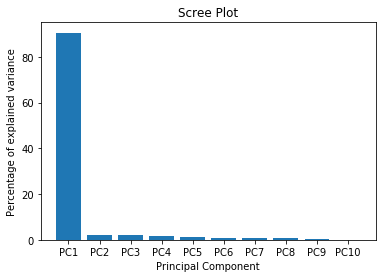

In [54]:
plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


In [58]:
pca_df = pd.DataFrame(pca_data , index =[*wt , *ko], columns= labels) # to draw a PCA plot, we'll first put the new coordinates, created by pca.transform(scaled.data), into a nice matrix where the rows have sample labels and the colums have PC labels

Below commands draw a scatter plot with a title and nice axis labels

Text(0,0.5,'PC2 -2.3%')

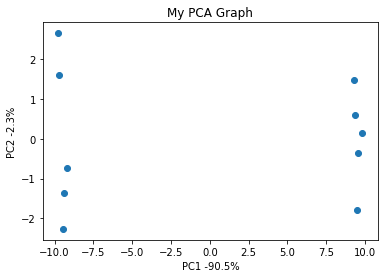

In [56]:
plt.scatter(pca_df.PC1 , pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 -{0}%'.format(per_var[0]))
plt.ylabel('PC2 -{0}%'.format(per_var[1]))

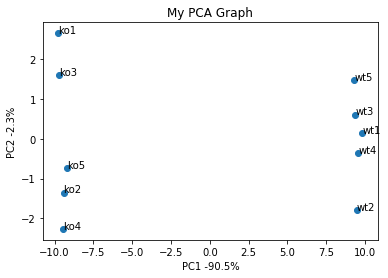

In [59]:
plt.scatter(pca_df.PC1 , pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 -{0}%'.format(per_var[0]))
plt.ylabel('PC2 -{0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample])) #this loop adds sample names to the graph
    
plt.show()

The "wt" samples clustered on the right side, suggesting that they are correlated with each other

The "ko" samples clustered on the left side, suggesting that they are correlated with each other

And the separation of the two clusters along the x-axis suggests that "wt" samples are very different from "ko" samples

# Lastly, lets look at the loading scores for PC1 to determine which genes had the largest influence on separating the two clusters along the x-axis

In [61]:
loading_scores = pd.Series(pca.components_[0], index=genes) #We'll start by creating a panda "Series" object with the loading scores in PC1
# pca.components_[0] : the PCs are zero-indexed, so PC1=0

In [66]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
#abs(): sorting the loading scores based on their magnitude (absolute values)

In [67]:
top_10_genes = sorted_loading_scores[0:10].index.values #getting the names of top 10 indexes (which are the gene names)
print(loading_scores[top_10_genes]) #print out 10 gene names and their corresponding loading scores

gene29    0.105068
gene71   -0.105066
gene34   -0.105059
gene19    0.105057
gene27    0.105049
gene44    0.105047
gene26   -0.105035
gene16    0.105034
gene86   -0.105030
gene59    0.105025
dtype: float64
